<a href="https://colab.research.google.com/github/myredex/tensorflow_tutorials/blob/master/02_tensorflow_binary_classification_simple_example_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Binary classification using Tensorflow

### Generate toy data for binary classification

In [ ]:
import tensorflow as tf
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000,
                  noise=0.03,
                  random_state=42)

X[0], y[0]

(array([-0.00933187,  0.39098105]), 1)

### Split data to train and test 

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

len(X_train), len(X_test)

(800, 200)

### Visualise data

In [ ]:
# Create perfomance visualisation function
def visualize_predictions(X_test, y_test, y_pred):

  plt.figure(figsize=(12, 6))

  # Plot test data
  plt.subplot(1, 2, 1)
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)

  # Plot predicted dat
  plt.subplot(1, 2, 2)
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)

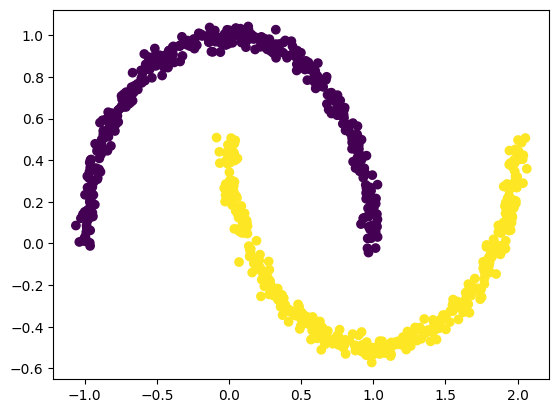

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)

### Create binary classification model with Tensorflow

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["accuracy"])

# Fit model
history = model.fit(X_train, y_train, 
                    epochs=15)

Epoch 1/15
25/25 [==============================] - 1s 3ms/step - loss: 0.5760 - accuracy: 0.7663
Epoch 2/15
25/25 [==============================] - 0s 3ms/step - loss: 0.3419 - accuracy: 0.8600
Epoch 3/15
25/25 [==============================] - 0s 2ms/step - loss: 0.2606 - accuracy: 0.8737
Epoch 4/15
25/25 [==============================] - 0s 3ms/step - loss: 0.2388 - accuracy: 0.8838
Epoch 5/15
25/25 [==============================] - 0s 2ms/step - loss: 0.2297 - accuracy: 0.8850
Epoch 6/15
25/25 [==============================] - 0s 2ms/step - loss: 0.2170 - accuracy: 0.8925
Epoch 7/15
25/25 [==============================] - 0s 2ms/step - loss: 0.2111 - accuracy: 0.8938
Epoch 8/15
25/25 [==============================] - 0s 3ms/step - loss: 0.2061 - accuracy: 0.8950
Epoch 9/15
25/25 [==============================] - 0s 3ms/step - loss: 0.2100 - accuracy: 0.8938
Epoch 10/15
25/25 [==============================] - 0s 3ms/step - loss: 0.2029 - accuracy: 0.8988
Epoch 11/15
25/25 [

### Evaluate model

In [ ]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 1s 11ms/step - loss: 0.1686 - accuracy: 0.9350


[0.1686248779296875, 0.9350000023841858]

7/7 [==============================] - 0s 2ms/step


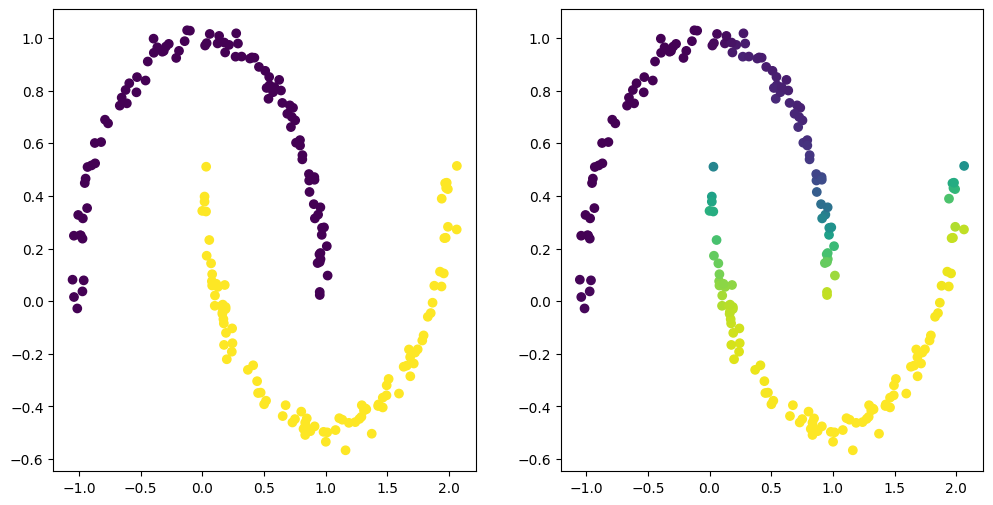

In [ ]:
y_pred = model.predict(X_test)

visualize_predictions(X_test, y_test, y_pred)

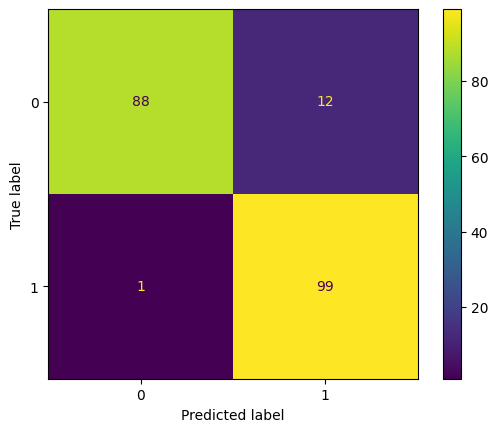

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, tf.round(y_pred))

ConfusionMatrixDisplay(cm).plot()